
Dataset Overview:
   CustomerID  Age  Income  SpendingScore  Tenure Region  InternetUsage
0           1   56   81228             59      17   West            246
1           2   69   68984             32       8  North            325
2           3   46   60774             96       4   West            100
3           4   32   22568             88       6   West            290
4           5   60   82592             52       8   West            180


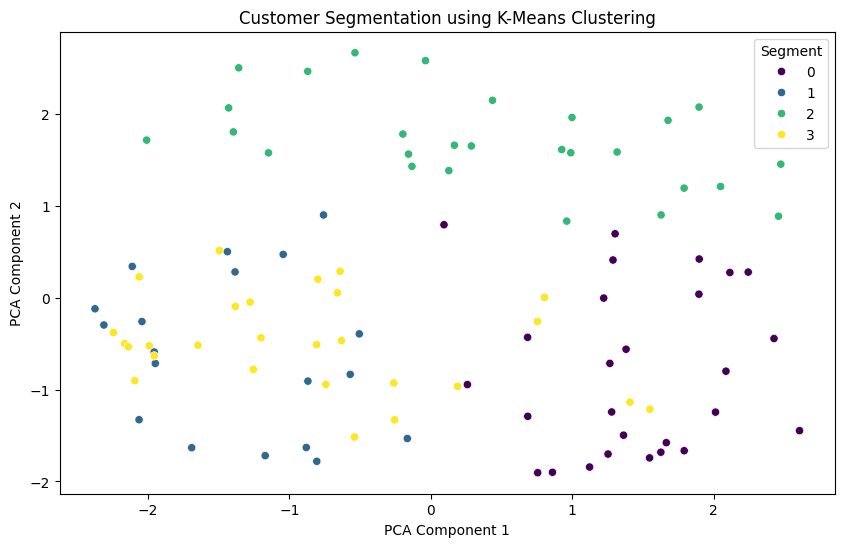

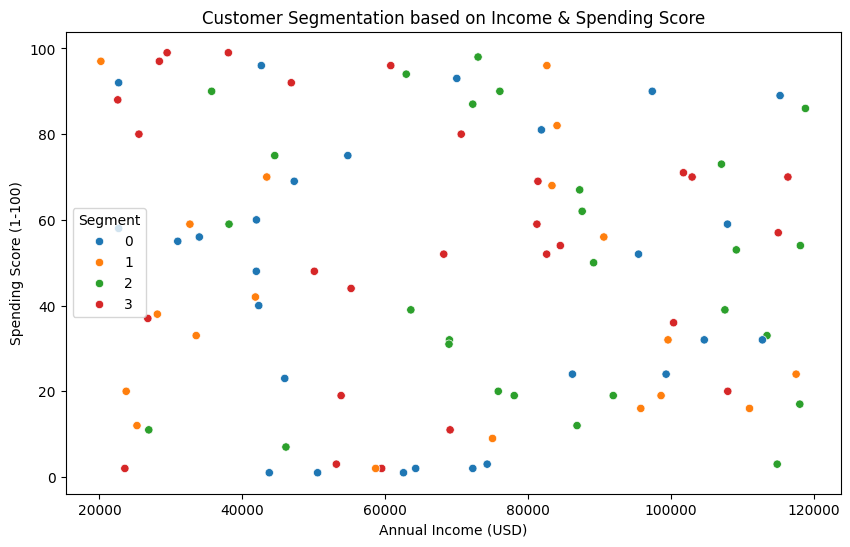


Segment Distribution:
Segment
3    27
2    27
0    27
1    19
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
np.random.seed(42)
data = {
    "CustomerID": range(1, 101),
    "Age": np.random.randint(18, 70, 100),
    "Income": np.random.randint(20000, 120000, 100),  
    "SpendingScore": np.random.randint(1, 100, 100),  
    "Tenure": np.random.randint(1, 20, 100),  
    "Region": np.random.choice(["North", "South", "East", "West"], 100),
    "InternetUsage": np.random.randint(1, 500, 100) 
}

df = pd.DataFrame(data)
print("\nDataset Overview:")
print(df.head())
df_encoded = pd.get_dummies(df, columns=["Region"], drop_first=True)
features = ["Age", "Income", "SpendingScore", "Tenure", "InternetUsage"] + list(df_encoded.columns[5:])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[features])
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  
df["Segment"] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue=df["Segment"], palette="viridis", data=df)
plt.title("Customer Segmentation using K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment")
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Income"], y=df["SpendingScore"], hue=df["Segment"], palette="tab10")
plt.title("Customer Segmentation based on Income & Spending Score")
plt.xlabel("Annual Income (USD)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Segment")
plt.show()
print("\nSegment Distribution:")
print(df["Segment"].value_counts())
df.to_csv("customer_segments.csv", index=False)